# Target Sum ways problem:
### You are given an integer array nums and an integer target.

### You want to build an expression out of nums by adding one of the symbols '+' and '-' before each integer in nums and then concatenate all the integers.

### For example, if nums = [2, 1], you can add a '+' before 2 and a '-' before 1 and concatenate them to build the expression "+2-1". Return the number of different expressions that you can build, which evaluates to target.

- Example 1:

- Input: nums = [1,1,1,1], target = 2
- Output: 4
- Explanation: There are 4 ways to assign symbols to make the sum of nums be target 2.

-1 + 1 + 1 + 1  = 2

+1 - 1 + 1 + 1  = 2

+1 + 1 - 1 + 1  = 2

+1 + 1 + 1 - 1  = 2


# intuition arround approach for solving target sum ways problem:
### as we're given an int-array and a target int-number ; so we haave to use either '-' or '+' before each number given in array to make sum of them equals to target number , and we have to return all those ways of sum(equals to target number) using each & every number in array with either '-' sign or '+' sign.

# let's first make recursive-tree to visualize above intuition:
### if nums : [1,1,1,1,1]  ; and target = 3 then we would traverse from index-0 to index upto n-1 (where n will be length of int-array here).
### with moving each index succesively we have only two options to include current-element of array :
### we can either include current element of aaray with '+' sign or include current element of array with '-' sign.
### and we have to do this each time for each number in int-array.
### while including all the numbers of array with either signs("+/-"): 
1. like including curr-element with + sign and including further all elements of array with either signs(+/-) gives us sum equals to target-number? [branch-1]
2. like including curr-element witn - sign and inclding further all elements of array with either signs (+/-) gives us sum equals to target-number? [branch-2]
### we have to return number of ways to acheive sum equals to target-num while including all numbers of array with either signs (+/-)
### so for this we have to calculate ways to achieve sum equals to target while num of array included positively(with + sign )
### and also have to calculate ways to achieve sum equals to target while num of array included negatively(with - sign )
### so target_sum_ways = ways_to_achieve_target_sum(branch-1: while num included positively) + ways_to_achieve_target_sum(branch-2: while num included negatively)   
- here this is recursive-tree taking index and total_so_far(total) as argument 
- while including the num with + sign it will add the corresponding number to the total, and move to next index recursively
- while including the num with - sign it will substract the corresponding number from the total, and move to next index recursively 
- in base-case we will check index goes up to n-1 or not , if it goes upto n-1 and total_so_far(total) equals to target-num then return 1 (as it will count it as one of the way to achieve target_sum) if total_so_far(total) not equals to target-num then return 0(as it will not count that path as one of the way to achieve target_sum)
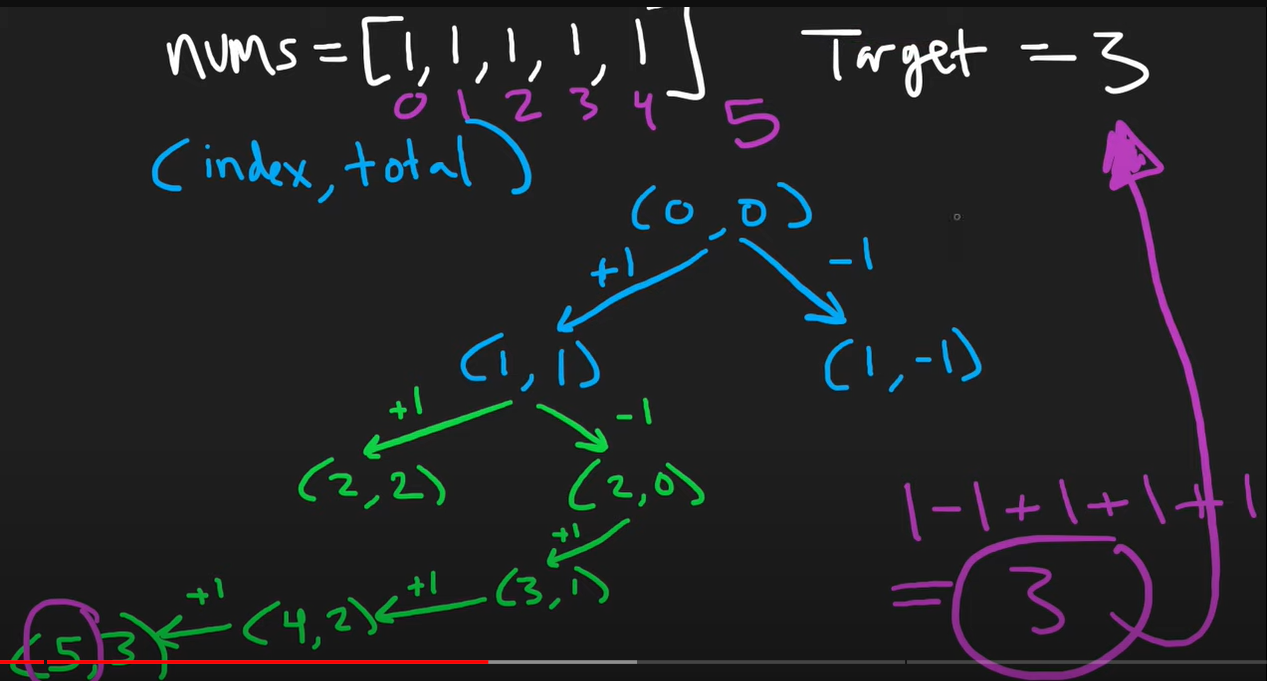

# recursive-approach complexity :
### if we use this recursive approach it will be have time-complexity : O(2^n)   [as here eahc node will have 2 branches certainly ] and depth of this binary-recursion-tree will be 'n', as each num of array we have to include with either signs(+/-)
### space complexity will be : 0(n) //recursive call-stack or recursive depth would be n only 
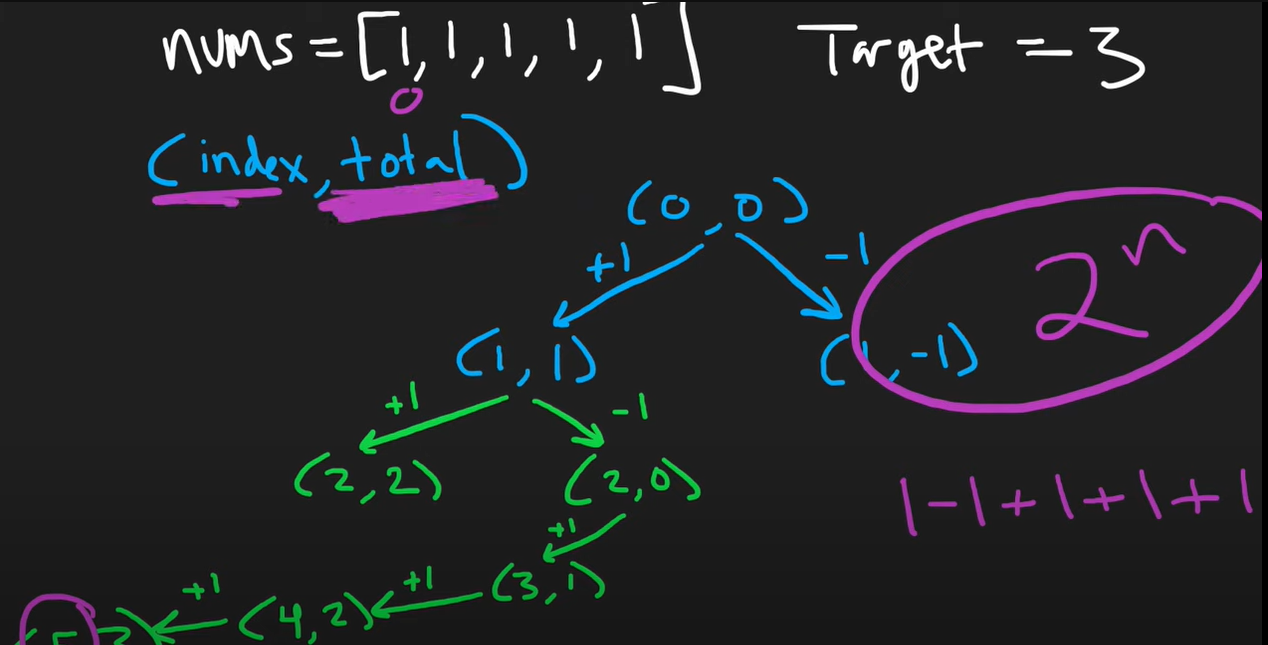

# here we're using memoisation approach for further optimising complexity:
### using 2-d dp_table with n+1 rows and T+1-columns (whichs store ways to acheive target-sum corresponds to total_so_far while available nums to be included with either sign(+/-))
### so time complexity here will be : O(n*t)
### so here space complexity will also be : O(n*t)  //as we construct 2-d dp_table with of (n+1 * t+1) rows by columns 
### for implementing dp_table here instead of constructing table we're here using hash-table which used to store number of ways to achieve target_sum for corresponding index and total_so_far(total) 
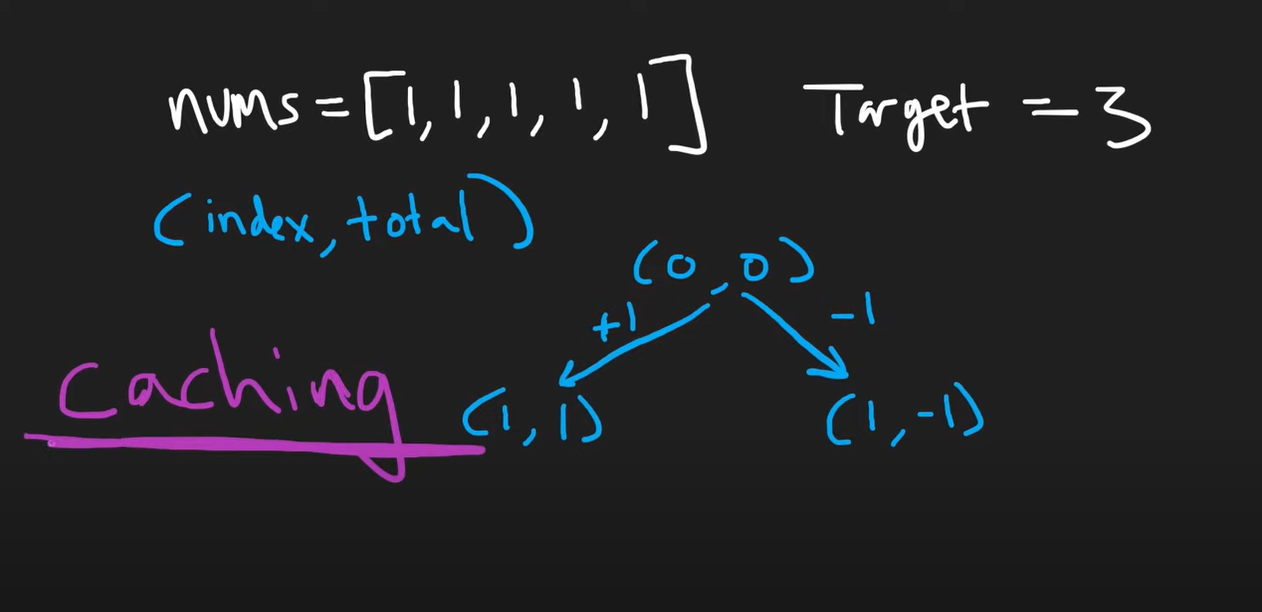
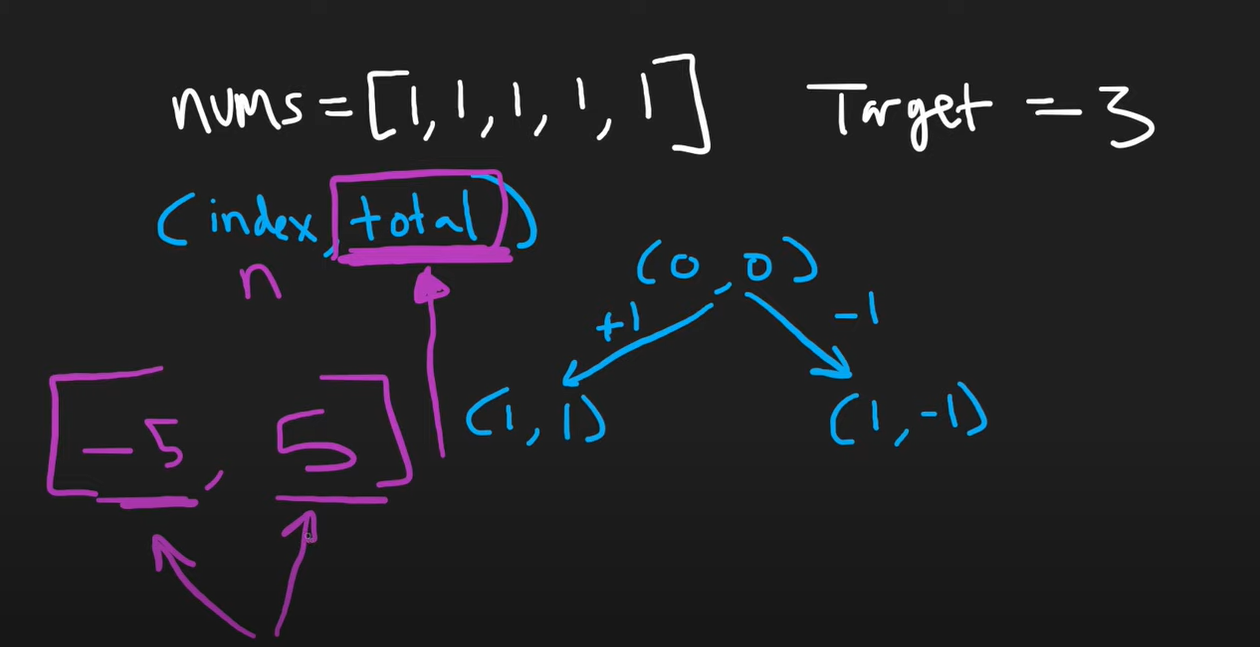
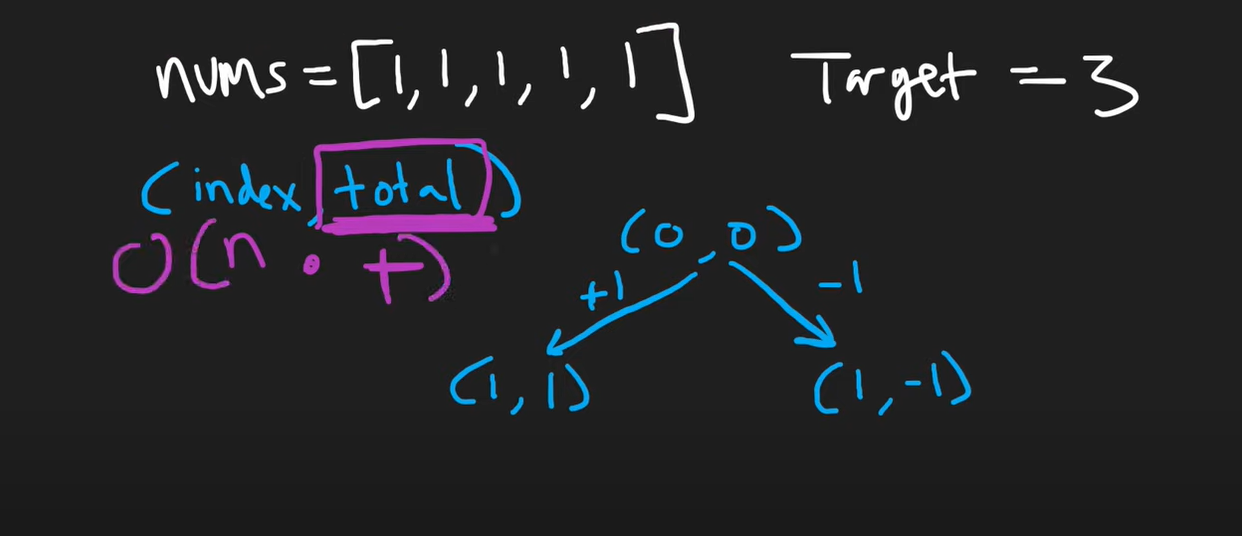

# code-implementation of memoisation(top-down)approach to solve target_sum_ways problem:
 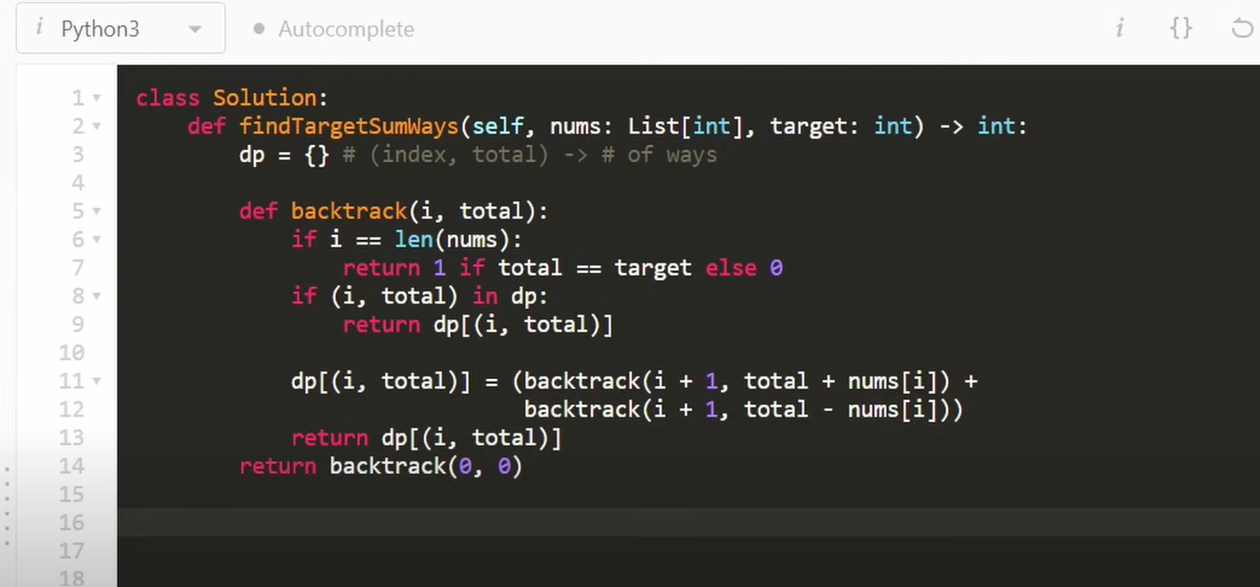

In [7]:
def findTargetSumWays(nums, target: int) -> int:
    # initialised hash table here ; dp //dictionary caching 
    dp =  {}  # will return number of ways to achieve target-sum from corresponding given index and total_so_far
    n = len(nums) # length of nums array
    def TargetSumWays_memo(index, totl_so_far):
        # base-cases: when index reached final element of array alongwith that we check that taeget_sum achieved or not if achieved return 1 else zero
        if index == n :
            return 1 if totl_so_far == target else 0
        #here we have to check that if number of ways already calculated for correponding index and total_so_far 
        # then we return value(number of ways ) using that index and total_so_far from dp
        if (index,totl_so_far) in dp:
            return dp[(index,totl_so_far)]
        # now recursive statements : with postively-include and negatively-include fromula 
        positively = TargetSumWays_memo(index+1, totl_so_far + nums[index])
        negatively = TargetSumWays_memo(index+1, totl_so_far - nums[index])
        # now for calculating total ways to achieve target_sum we have to add both positively-included num-branch cases and negatively-included num-branch cases.
        # and storing this total ways to dp table at correponding index and total_so_far 
        dp[(index, totl_so_far)] = positively + negatively
        return dp[(index,totl_so_far)] 
    return TargetSumWays_memo(0,0)   

# example usage :
nums = [1,1,1,1,1]
target = 3
print(findTargetSumWays(nums, target)) # should be 5

nums1 = [1,1,1,1]
target1 = 2
print(findTargetSumWays(nums1, target1)) # should be 4
     

5
4


In [8]:
def findTargetSumWays(nums, target):
    n = len(nums)
    summation = sum(nums)
    dp = [[None]*(2*summation+1) for _ in range(n)]

    def helper(index,sum_nums):
        #base case
        if index<0:
            if sum_nums==target:return 1
            else:return 0
        if dp[index][sum_nums+summation]!=None:return dp[index][sum_nums+summation]

        negative = helper(index-1,sum_nums+-1*nums[index])
        positive = helper(index-1,sum_nums+nums[index])    
        dp[index][sum_nums+summation] = negative+positive
        return dp[index][sum_nums+summation]
    return helper(n-1,0) 

# example usage :
nums = [1,1,1,1,1]
target = 3
print(findTargetSumWays(nums, target)) # should be 5

nums1 = [1,1,1,1]
target1 = 2
print(findTargetSumWays(nums1, target1)) # should be 4

5
4
